# Setup

In [1]:
%pip install control

Note: you may need to restart the kernel to use updated packages.


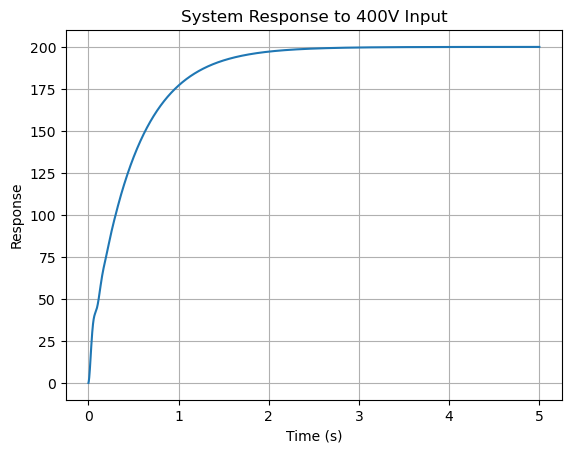

In [ ]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling time
T = 0.00175

# Define the transfer functions
num_gpz = [0.0058540, 0, 0]
den_gpz = [1, -1.9224928, 0.9337476]

gpz = ctrl.TransferFunction(num_gpz, den_gpz, T)
gpi = 0.15 * ct.TransferFunction([1, -0.95], [1, -1], T)
# gpid = 1 * ctrl.TransferFunction([1, -0.2], [1, -0.1], T)

# Compute the closed-loop transfer function
sys_open_loop = ctrl.series(gpz, gpi)  # C(s) * G(s)
sys_closed_loop = ctrl.feedback(sys_open_loop, 1)

# Root locus plot
# Simulate system response to a 400V input and 0 load
time = np.arange(0, 5, T)
T_out, yout = ctrl.forced_response(sys_closed_loop, T=time, U=np.ones_like(time)*200)

# Plot the response
plt.figure()
plt.plot(T_out, yout)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('System Response to 400V Input')
plt.grid()
plt.show()

c:\Users\ALUNO\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


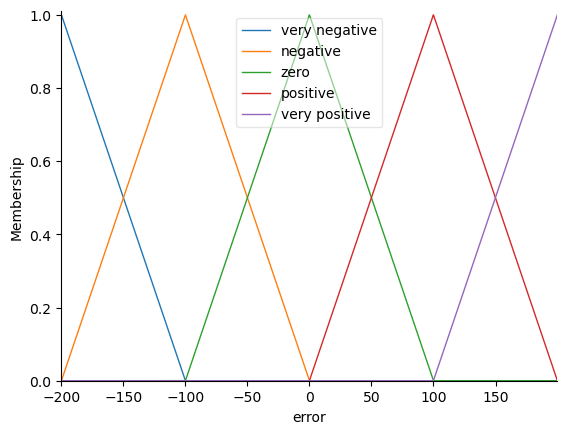

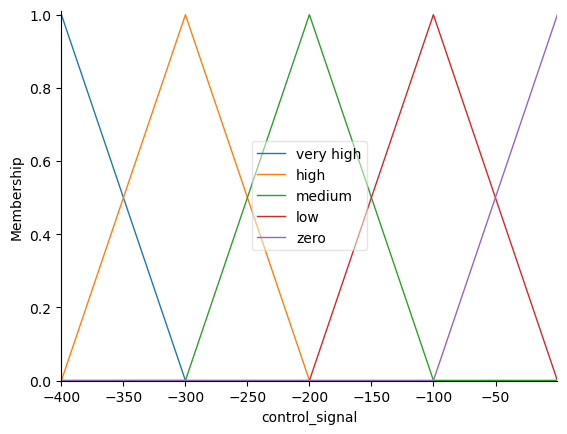

In [34]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the sampling time
T = 0.00175

# Define the transfer function for the plant (gpz)
num_gpz = [0.0058540, 0, 0]
den_gpz = [1, -1.9224928, 0.9337476]
gpz = ct.TransferFunction(num_gpz, den_gpz, T)

# ================================================
# Fuzzy Logic Controller Design
# ================================================

# Define the input and output variables
error = ctrl.Antecedent(np.arange(-200, 200, 0.1), "error")
control_signal = ctrl.Consequent(np.arange(-400, 0, 0.1), "control_signal")

error.automf(names=["very negative", "negative", "zero", "positive", "very positive"])
control_signal.automf(names=["very high", "high", "medium", "low", "zero"])

# Define fuzzy rules
rules = [
    ctrl.Rule(error["very negative"], control_signal["very high"]),
    ctrl.Rule(error["negative"], control_signal["high"]),
    ctrl.Rule(error["zero"], control_signal["zero"]),
    ctrl.Rule(error["positive"], control_signal["high"]),
    ctrl.Rule(error["very positive"], control_signal["very high"])
]

# Create the fuzzy control system
fuzzy_ctrl = ctrl.ControlSystem(rules)
fuzzy_sim = ctrl.ControlSystemSimulation(fuzzy_ctrl)

error.view()
control_signal.view()

# fuzzy_sim.input["error"] = -400
# fuzzy_sim.view(sim="negative")

Control Signal: 1.0658141036402678e-12


c:\Users\ALUNO\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


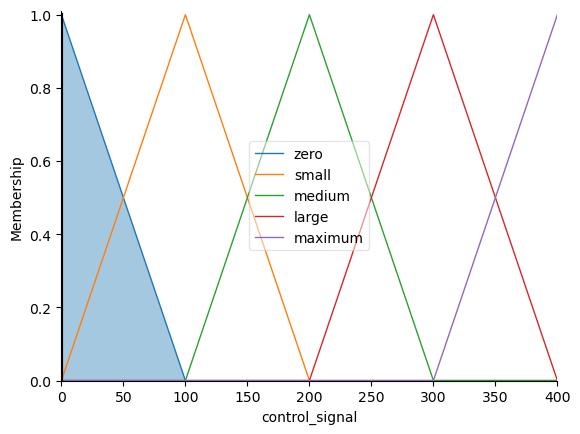

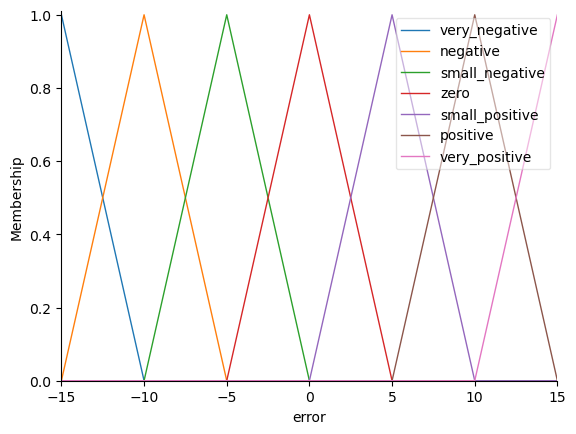

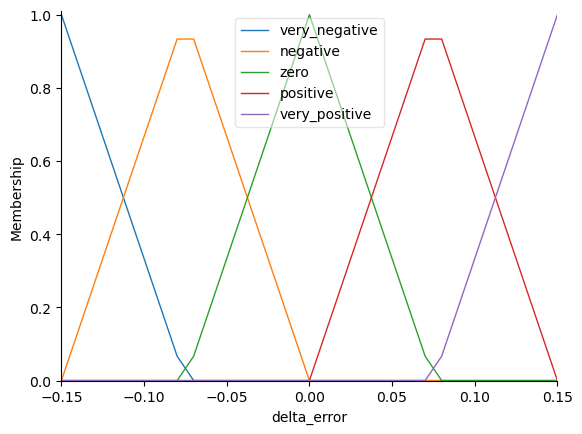

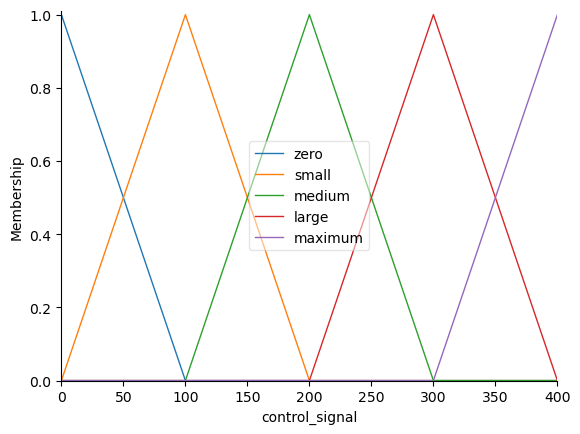

In [81]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# ================================================
# Define Input and Output Variables
# ================================================

error = ctrl.Antecedent(np.arange(-15, 15.1, 0.1), 'error')
delta_error = ctrl.Antecedent(np.arange(-0.15, 0.16, 0.01), 'delta_error')
control_signal = ctrl.Consequent(np.arange(0, 400.1, 0.1), 'control_signal')

# ================================================
# Define Membership Functions
# ================================================

# Membership functions for "error"
error.automf(7, names=['very_negative', 'negative', 'small_negative', 'zero', 'small_positive', 'positive', 'very_positive'])
delta_error.automf(5, names=['very_negative', 'negative', 'zero', 'positive', 'very_positive'])

# Define manual membership functions for "control_signal"
control_signal.automf(5, names=['zero', 'small', 'medium', 'large', 'maximum'])

# Use 'lom' (Largest of Maximum) to prevent small residual outputs
control_signal.defuzzify_method = 'lom'

# ================================================
# Define Fuzzy Rules
# ================================================

rules = [
    # Max control effort for very large errors
    ctrl.Rule(error['very_negative'] & delta_error['very_negative'], control_signal['maximum']),
    ctrl.Rule(error['very_negative'] & delta_error['negative'], control_signal['maximum']),
    ctrl.Rule(error['very_negative'] & delta_error['zero'], control_signal['large']),
    ctrl.Rule(error['very_negative'] & delta_error['positive'], control_signal['medium']),
    ctrl.Rule(error['very_negative'] & delta_error['very_positive'], control_signal['small']),

    # Strong control effort for negative errors
    ctrl.Rule(error['negative'] & delta_error['very_negative'], control_signal['large']),
    ctrl.Rule(error['negative'] & delta_error['negative'], control_signal['large']),
    ctrl.Rule(error['negative'] & delta_error['zero'], control_signal['medium']),
    ctrl.Rule(error['negative'] & delta_error['positive'], control_signal['small']),
    ctrl.Rule(error['negative'] & delta_error['very_positive'], control_signal['zero']),

    # Medium correction for small errors
    ctrl.Rule(error['small_negative'] & delta_error['very_negative'], control_signal['medium']),
    ctrl.Rule(error['small_negative'] & delta_error['negative'], control_signal['medium']),
    ctrl.Rule(error['small_negative'] & delta_error['zero'], control_signal['small']),
    ctrl.Rule(error['small_negative'] & delta_error['positive'], control_signal['zero']),
    ctrl.Rule(error['small_negative'] & delta_error['very_positive'], control_signal['zero']),

    # Fine control near zero error
    ctrl.Rule(error['zero'] & delta_error['very_negative'], control_signal['small']),
    ctrl.Rule(error['zero'] & delta_error['negative'], control_signal['zero']),
    ctrl.Rule(error['zero'] & delta_error['zero'], control_signal['zero']),
    ctrl.Rule(error['zero'] & delta_error['positive'], control_signal['zero']),
    ctrl.Rule(error['zero'] & delta_error['very_positive'], control_signal['zero']),

    # Braking effect for overshoot
    ctrl.Rule(error['small_positive'] & delta_error['very_negative'], control_signal['zero']),
    ctrl.Rule(error['small_positive'] & delta_error['negative'], control_signal['zero']),
    ctrl.Rule(error['small_positive'] & delta_error['zero'], control_signal['zero']),
    ctrl.Rule(error['small_positive'] & delta_error['positive'], control_signal['small']),
    ctrl.Rule(error['small_positive'] & delta_error['very_positive'], control_signal['medium']),

    ctrl.Rule(error['positive'] & delta_error['very_negative'], control_signal['zero']),
    ctrl.Rule(error['positive'] & delta_error['negative'], control_signal['zero']),
    ctrl.Rule(error['positive'] & delta_error['zero'], control_signal['zero']),
    ctrl.Rule(error['positive'] & delta_error['positive'], control_signal['small']),
    ctrl.Rule(error['positive'] & delta_error['very_positive'], control_signal['large']),

    ctrl.Rule(error['very_positive'] & delta_error['very_negative'], control_signal['zero']),
    ctrl.Rule(error['very_positive'] & delta_error['negative'], control_signal['zero']),
    ctrl.Rule(error['very_positive'] & delta_error['zero'], control_signal['zero']),
    ctrl.Rule(error['very_positive'] & delta_error['positive'], control_signal['medium']),
    ctrl.Rule(error['very_positive'] & delta_error['very_positive'], control_signal['large']),
]

# ================================================
# Create and Simulate Fuzzy Control System
# ================================================

fuzzy_ctrl = ctrl.ControlSystem(rules)
fuzzy_sim = ctrl.ControlSystemSimulation(fuzzy_ctrl)

# Example: Simulate for a specific error and delta_error
fuzzy_sim.input['error'] = 0  # Zero error
fuzzy_sim.input['delta_error'] = 0  # Zero delta error
fuzzy_sim.compute()

# Output the control signal
print("Control Signal:", fuzzy_sim.output['control_signal'])
control_signal.view(sim=fuzzy_sim)

error.view()
delta_error.view()
control_signal.view()

plt.show()


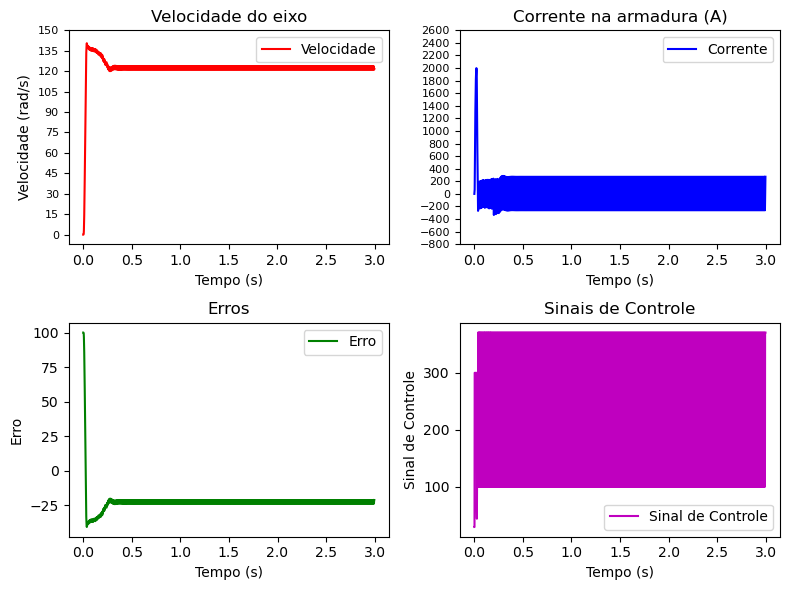

In [82]:
# Simulação Motor CC com variação de carga e variação paramétrica
from math import pi
from numpy import array, identity, arange
import matplotlib.pyplot as plt

# Definição dos parâmetros do motor
Pmec = 95 * 10**3
n = 0.913
Vn = 400
Wn = 1890 * pi / 30
Ra = 0.08
J = 0.56
La = 1.4 * 10**-3

Pele = Pmec / n
Cmn = Pmec / Wn
Ian = Pele / Vn
Kf = (Vn - Ian * Ra) / Wn
B = (Kf * Ian - Cmn) / Wn
Tm = J / B
Te = La / Ra
T = Te / 10

# Definição das matrizes A, B e C
A = array([[1 - T / Te, -Kf * T / La], [Kf * T / J, 1 - T / Tm]])

B = array([[T / La, 0], [0, -T / J]])

C = identity(2)  # Matriz identidade 2x2

# Definindo parâmetros da simulação
x = array([[0], [0]])
u = array([[0], [0]])
W, Ia, t = [0], [0], [0]
tempo = 0
N = int(3/T)  # Número de iterações (apróx 5 s)
setpoint = 100
errors = []
delta_errors = []
signals = []

control_signal.defuzzify_method = "bisector"

for i in range(1, N):
    # Compute the error
    error_percent = (setpoint - W[-1])/setpoint * 100
    delta_error = 0 if len(errors) == 0 else errors[-1] - error_percent
    errors.append(error_percent)
    delta_errors.append(delta_error)

    # Set the input to the fuzzy controller
    fuzzy_sim.input["error"] = error_percent
    fuzzy_sim.input["delta_error"] = delta_error
    
    # Compute the fuzzy control signal
    fuzzy_sim.compute()

    # Get the control signal from the fuzzy controller
    control_signal_current = fuzzy_sim.output["control_signal"]
    signals.append(control_signal_current)

    u.put(0, control_signal_current)

    # Calculando as saídas e armazenando-as
    x = A.dot(x) + B.dot(u)

    Ia.append(x[0].item())
    W.append(x[1].item())

    # Incrementando e armazenando o tempo de simulação
    tempo += T
    t.append(tempo)


# Mostrando os gráficos de velocidade, corrente, erros e sinais em uma matriz 2x2
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

# Gráfico de Velocidade
ax1.plot(t, W, color="r")
ax1.set_title("Velocidade do eixo")
ax1.set_xlabel("Tempo (s)")
ax1.set_ylabel("Velocidade (rad/s)")
ax1.set_yticks(arange(min(W), max(W) + 20, 15))
ax1.tick_params(axis='y', labelsize=8)
ax1.legend(["Velocidade"])

# Gráfico de Corrente
ax2.plot(t, Ia, color="b")
ax2.set_title("Corrente na armadura (A)")
ax2.set_xlabel("Tempo (s)")
ax2.set_yticks(arange(-800, 2800, 200))
ax2.tick_params(axis='y', labelsize=8)
ax2.legend(["Corrente"])

# Gráfico de Erros
ax3.plot(t[:-1], errors, color="g")
ax3.set_title("Erros")
ax3.set_xlabel("Tempo (s)")
ax3.set_ylabel("Erro")
ax3.legend(["Erro"])

# Gráfico de Sinais de Controle
ax4.plot(t[:-1], signals, color="m")
ax4.set_title("Sinais de Controle")
ax4.set_xlabel("Tempo (s)")
ax4.set_ylabel("Sinal de Controle")
ax4.legend(["Sinal de Controle"])

plt.tight_layout()
plt.show()
